<a href="https://colab.research.google.com/github/amedeotolace/Amedeo_Thesis_2/blob/main/IDS_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Installazione dei package utili***

In [37]:
# @title Installazione package
!pip install tensorflow
!pip install tensorflow_datasets
!pip install tensorflow tensorflow_decision_forests
!pip install datapackage
!pip install pandas
!pip install keras
!pip install tensorflow numpy scikit-learn
!pip install scikit-learn

## ***Caricamento del dataset attraverso Pandas del file .CSV***

In [38]:
import datapackage
import pandas as pd
"""
data_url = 'https://datahub.io/machine-learning/kddcup99/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        dataset_df = pd.read_csv(resource.descriptor['path'])
        #print (dataset_df)
"""
dataset_df = pd.read_csv("drive/MyDrive/kddcup99_csv.csv")
dataset_df.head()

,duration,protocol_type,service,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,...,0.0,0.0,normal
1,0,tcp,http,...,0.0,0.0,normal
2,0,tcp,http,...,0.0,0.0,normal
3,0,tcp,http,...,0.0,0.0,normal
4,0,tcp,http,...,0.0,0.0,normal


## ***Analisi del dataset***

In [39]:
def binning_dataset(dataset_df):
  import pandas as pd

  #Creiamo i gruppi per il binning
  gruppi = {
      'back': 'DoS',
      'buffer_overflow': 'U2R',
      'ftp_write': 'R2L',
      'guess_passwd': 'R2L',
      'imap': 'R2L',
      'ipsweep': 'Probe',
      'land': 'DoS',
      'loadmodule': 'U2R',
      'multihop': 'R2L',
      'neptune': 'DoS',
      'nmap': 'Probe',
      'normal': 'Normal',
      'perl': 'U2R',
      'phf': 'R2L',
      'pod': 'DoS',
      'portsweep': 'Probe',
      'rootkit': 'U2R',
      'satan': 'Probe',
      'smurf': 'DoS',
      'spy': 'R2L',
      'teardrop': 'DoS',
      'warezclient': 'R2L',
      'warezmaster': 'R2L'
  }

  # Applichiamo il binning utilizzando la funzione map di pandas
  dataset_df['categorie_binned'] = dataset_df['label'].map(gruppi)

  #dataset_df['categorie_binned'].value_counts()

print("="*200)
print("Eseguo il binning del dataset di train")
binning_dataset(dataset_df)
dataset_df['categorie_binned'].value_counts()

Eseguo il binning del dataset di train


DoS       391458
Normal     97277
Probe       4107
R2L         1126
U2R           52
Name: categorie_binned, dtype: int64

In [40]:
dataset_df['label'].value_counts()

smurf      280790
neptune    107201
            ...  
perl            3
spy             2
Name: label, Length: 23, dtype: int64

In [41]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

ENCODING = 'utf-8'

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v, round(100 * (s[v] / t), 2)))
    return "[{}]".format(",".join(result))

def analyze2(dataset_df):
    cols = dataset_df.columns.values
    #print(cols)
    total = float(len(dataset_df))
    #print(total)
    #print()

    print('Numero di features:', dataset_df.shape[1])
    print('='*40)
    output = dataset_df['label'].values
    labels = set(output)
    #print('Tipologia di output differenti:', labels)
    print('Tipologia di output differenti:')
    for label in labels:
        print(label)
    print('='*250)
    print('Numero di differenti output:', len(labels))

    # Verifico se ci sono valori nulli all'interno del dataset
    #null_values = len(dataset_df[dataset_df.isnull().any(axis=1)])
    #print('=' * 50)
    #print("Numero di valori null:", null_values, " all'interno del dataset")

    # Controllo eventuali valori duplicati
    print('=' * 50)
    #print("Elimino eventuali valori duplicati")
    #dataset_df.drop_duplicates(keep='first', inplace=True)
    df_val_duplicati = dataset_df.drop_duplicates(keep='first')
    print("I valori duplicati eliminati sono ", len(df_val_duplicati))

    #Verifico se ci sono valori nulli all'interno del dataset
    print('='*50)
    print("Numero di valori null:",len(dataset_df[dataset_df.isnull().any(axis=1)])," all'interno del dataset")

    #Elimino eventuali valori nulli
    #print('='*50)
    #print("Elimino eventuali valori nulli")
    #dataset_df.dropna(inplace = True)

    #Analizzo la lunghezza del dataset
    print('='*50)
    print("Vi sono {} righe.".format(len(dataset_df)))

    #Effettuo un'analisi esplorativa dei dati, analizzando quanti valori trovo per un determinato tipo di attacco
    print('='*50)

    print()
    cols = dataset_df.columns.values
    total = float(len(dataset_df))

    print("{} rows".format(int(total)))

    # Sorting the columns based on the percentage of unique values in descending order
    sorted_data = sorted(cols, key=lambda x: len(dataset_df[x].unique()) / total, reverse=True)

    # Create a list of dictionaries to store the results
    results = []

    """
    for col in sorted_data:
        uniques = dataset_df[col].unique()
        unique_count = len(uniques)
        if unique_count > 100:
            result = {"Column": col, "Unique Count": unique_count, "Percentage": int((unique_count / total) * 100)}
            results.append(result)
        else:
            result = {"Column": col, "Categories": expand_categories(dataset_df[col])}
            results.append(result)
    """

    for col in sorted_data:
        uniques = dataset_df[col].unique()
        unique_count = len(uniques)
        result = {"Column": col,"Unique Count": unique_count,"Categories": expand_categories(dataset_df[col])}
        results.append(result)

    # Create a DataFrame from the list of dictionaries
    results_df = pd.DataFrame(results)
    return results_df


In [42]:
#Analizzo il dataset di train
print("="*250)
print("Stampo l'analisi del dataset di train")
results_df = analyze2(dataset_df)

Stampo l'analisi del dataset di train
Numero di features: 43
Tipologia di output differenti:
pod
warezmaster
buffer_overflow
satan
rootkit
spy
ipsweep
imap
smurf
back
nmap
neptune
portsweep
perl
normal
warezclient
land
ftp_write
teardrop
multihop
loadmodule
phf
guess_passwd
Numero di differenti output: 23
I valori duplicati eliminati sono  145585
Numero di valori null: 0  all'interno del dataset
Vi sono 494020 righe.

494020 rows


In [43]:
results_df

,Column,Unique Count,Categories
0,dst_bytes,10725,"[0:82.64%,105:0.9%,147:0.51%,146:0.46%,8314:0...."
1,src_bytes,3300,"[1032:46.16%,0:23.35%,520:10.68%,105:1.49%,147..."
...,...,...,...
41,lnum_outbound_cmds,1,[0:100.0%]
42,is_host_login,1,[0:100.0%]


In [44]:
dataset_df.describe()

,duration,src_bytes,dst_bytes,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.0000,4.940200e+05,4.940200e+05,...,494020.000000,494020.000000,494020.000000
mean,47.9794,3.025616e+03,8.685308e+02,...,0.176443,0.058118,0.057412
...,...,...,...,...,...,...,...
75%,0.0000,1.032000e+03,0.000000e+00,...,0.000000,0.000000,0.000000
max,58329.0000,6.933756e+08,5.155468e+06,...,1.000000,1.000000,1.000000


In [45]:
dataset_df['categorie_binned'].value_counts()

DoS       391458
Normal     97277
Probe       4107
R2L         1126
U2R           52
Name: categorie_binned, dtype: int64

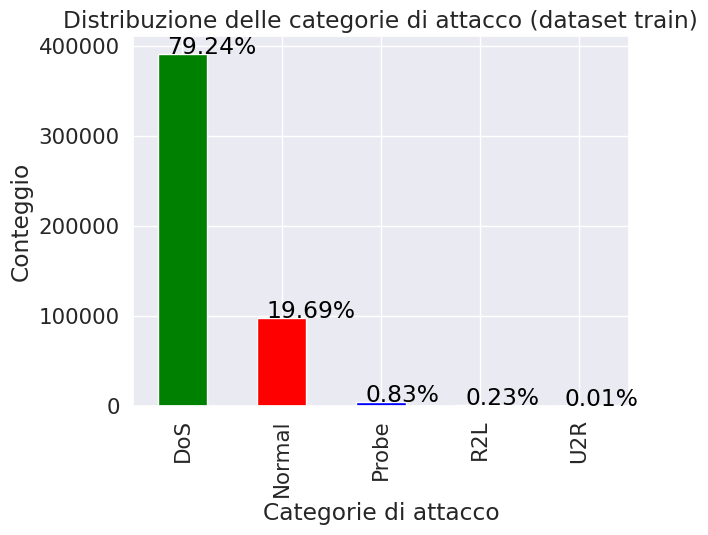

In [46]:
conteggio_valori = dataset_df['categorie_binned'].value_counts()
conteggio_valori.plot(kind='bar', color=['green', 'red', 'blue', 'orange', 'purple'])

# Aggiungiamo etichette e titoli
plt.xlabel('Categorie di attacco')
plt.ylabel('Conteggio')
plt.title('Distribuzione delle categorie di attacco (dataset train)')


conteggi_percentuali = dataset_df['categorie_binned'].value_counts(normalize=True) * 100

for i, v in enumerate(dataset_df['categorie_binned'].value_counts()):
    plt.text(i - 0.15, v + 0.5, f'{conteggi_percentuali[i]:.2f}%', color='black', fontweight='normal')

# Visualizziamo il grafico
plt.show()
#Diagramma a torte

Eseguendo un raggruppamento sulle tipologie di attacco, si è evidenziato una maggiore quantità di record relativi agli attacchi di tipo DoS, rispetto alle altre tipologie.

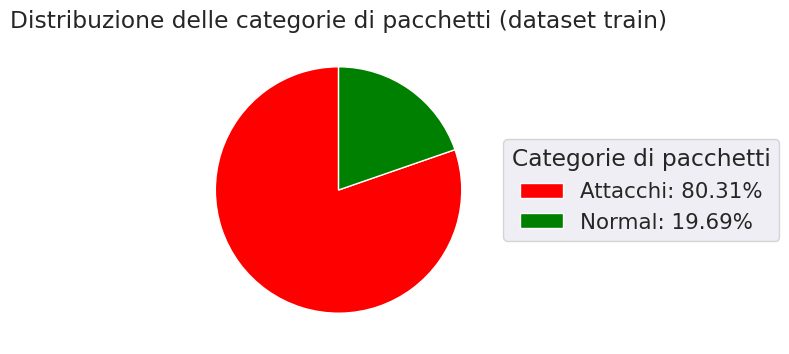

In [47]:
import matplotlib.pyplot as plt

dataset_df['grouped_categories'] = dataset_df['categorie_binned'].apply(lambda x: 'Normal' if x == 'Normal' else 'Attacchi')

conteggio_valori = dataset_df['grouped_categories'].value_counts()

plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(conteggio_valori, labels=None, autopct='',
                                   textprops=dict(size=10), colors=['red', 'green'], startangle=90,
                                   labeldistance=1.5)

plt.title('Distribuzione delle categorie di pacchetti (dataset train)')

legend_labels = [f'{label}: {percentage:.2f}%' for label, percentage in zip(conteggio_valori.index, (conteggio_valori / conteggio_valori.sum()) * 100)]
plt.legend(wedges, legend_labels, title='Categorie di pacchetti', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


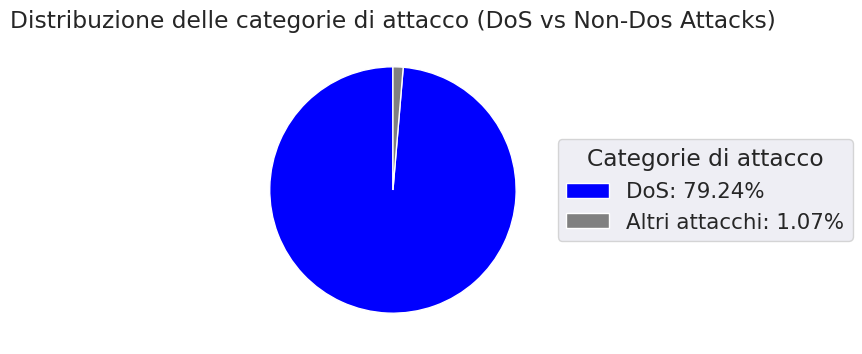

In [48]:
import matplotlib.pyplot as plt

# Filtra i pacchetti 'Normal' e 'DoS'
non_dos_df = dataset_df[~dataset_df['categorie_binned'].isin(['Normal'])]

conteggio_valori = non_dos_df['categorie_binned'].value_counts()
valori_dos = {'DoS': conteggio_valori.pop('DoS')}
# Plot the pie chart
plt.figure(figsize=(8, 4))

# Calculate the percentage for 'DoS'
percentage_dos = valori_dos['DoS']/ dataset_df.shape[0] * 100

#Calcola percentuale di attacchi Non Dos
percentage_non_dos = conteggio_valori / dataset_df.shape[0] * 100

#percentage_non_dos.pop('DoS')
#print(percentage_non_dos)
#attacchi_non_DoS = percentage_non_dos.sum()
#print(attacchi_non_DoS)
#print(type(percentage_non_dos))

#colors =plt.cm.viridis(percentage_non_dos)

wedges_combined, _, autotexts_combined = plt.pie([valori_dos['DoS'], conteggio_valori.sum()], autopct='',
                                                 textprops=dict(size=10), colors=['blue','grey'],
                                                 startangle=90)

# Create labels for both 'DoS' and 'Non-Dos Attacks'
labels_combined = [f'DoS: {percentage_dos.sum():.2f}%'] + [f'Altri attacchi: {percentage_non_dos.sum():.2f}%']

plt.title('Distribuzione delle categorie di attacco (DoS vs Non-Dos Attacks)')

# Posiziona la legenda in alto a destra
plt.legend(wedges_combined, labels_combined, title='Categorie di attacco',
           loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

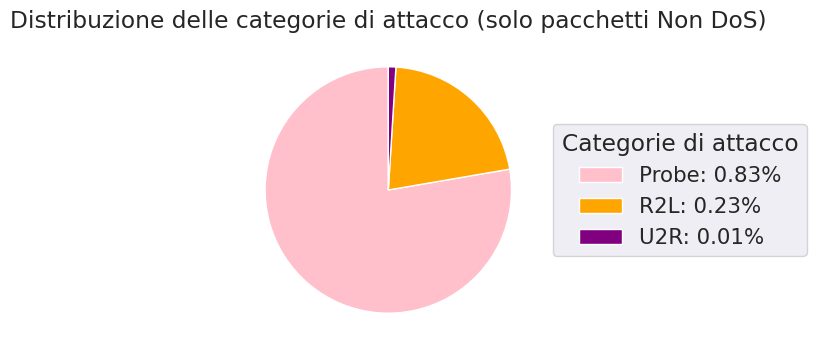

In [49]:
import matplotlib.pyplot as plt

# Filtra i pacchetti 'Normal' e 'DoS'
non_dos_df = dataset_df[~dataset_df['categorie_binned'].isin(['Normal', 'DoS'])]

# Conta i valori relativi alle categorie di attacco (solo pacchetti 'Non Normal' e 'Non DoS')
conteggio_valori = non_dos_df['categorie_binned'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(conteggio_valori, labels=None, autopct='',
                                   textprops=dict(size=10), colors=['pink', 'orange', 'purple'], startangle=90,
                                   labeldistance=1.5)

plt.title('Distribuzione delle categorie di attacco (solo pacchetti Non DoS)')

# Calcola le percentuali rispetto al dataset totale
percentages = conteggio_valori / dataset_df.shape[0] * 100

# Crea una legenda con la percentuale delle diverse label e i relativi colori associati
legend_labels = [f'{label}: {percentage:.2f}%' for label, percentage in zip(conteggio_valori.index, percentages)]
plt.legend(wedges, legend_labels, title='Categorie di attacco', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


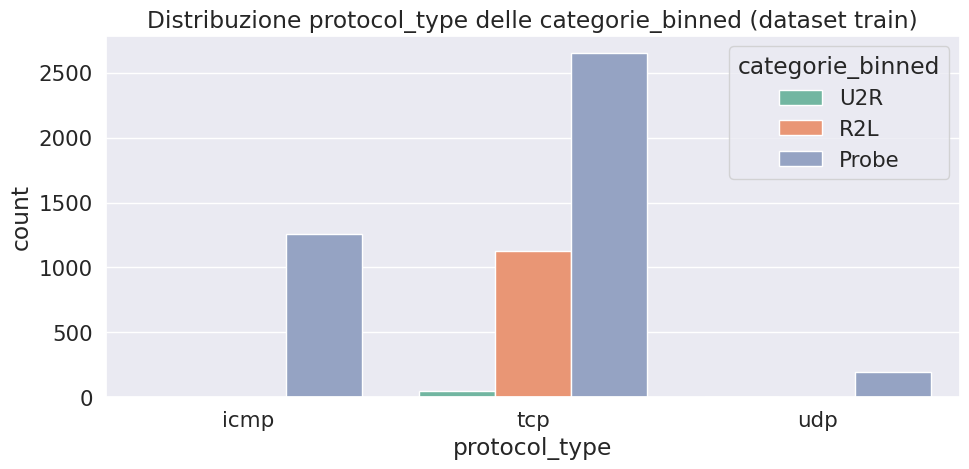

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = dataset_df.select_dtypes(include='number').columns
#symbolic_columns = ['protocol_type', 'flag']

custom_palette = sns.color_palette("Set2", 3)  # Puoi scegliere una palette diversa a tuo piacimento

plt.figure(figsize=(10, 5))

sorted_counts = dataset_df['protocol_type'].value_counts().sort_values(ascending=False)
# Filter out 'Normal' category before plotting
sns.countplot(x='protocol_type', hue='categorie_binned', data=dataset_df[(dataset_df['categorie_binned'] != 'Normal') & (dataset_df['categorie_binned'] != 'DoS')],
                      order=sorted_counts.index, palette=custom_palette)
plt.title(f'Distribuzione protocol_type delle categorie_binned (dataset train)')

plt.tight_layout()
plt.show()


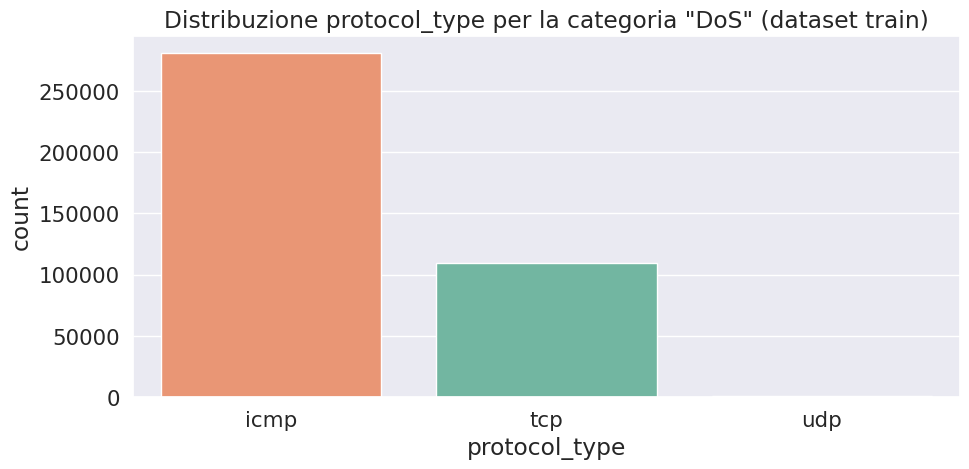

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona solo le colonne di tipo numerico per il grafico di dispersione
numeric_columns = dataset_df.select_dtypes(include='number').columns

custom_palette = sns.color_palette("Set2", n_colors=3)

plt.figure(figsize=(10, 5))

# Filtra solo per la categoria 'DoS'
dos_df = dataset_df[dataset_df['categorie_binned'] == 'DoS']

sorted_counts = dos_df['protocol_type'].value_counts().sort_values(ascending=False)

# Plot
sns.countplot(x='protocol_type', data=dos_df, order=sorted_counts.index, palette=custom_palette, hue='protocol_type', legend=False)
plt.title(f'Distribuzione protocol_type per la categoria "DoS" (dataset train)')

plt.tight_layout()
plt.show()


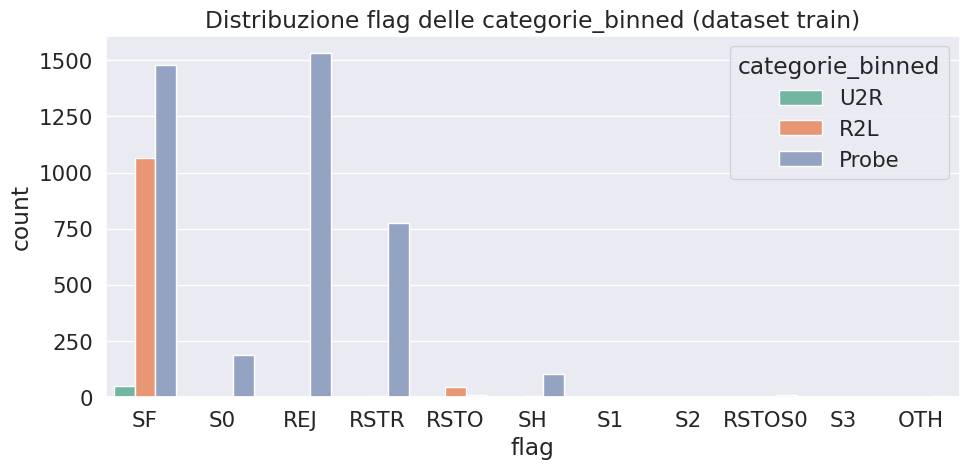

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = dataset_df.select_dtypes(include='number').columns
#symbolic_columns = ['protocol_type', 'flag']

custom_palette = sns.color_palette("Set2", 3)  # Puoi scegliere una palette diversa a tuo piacimento

plt.figure(figsize=(10, 5))

sorted_counts = dataset_df['flag'].value_counts().sort_values(ascending=False)
# Filter out 'Normal' category before plotting
sns.countplot(x='flag', hue='categorie_binned', data=dataset_df[(dataset_df['categorie_binned'] != 'Normal') & (dataset_df['categorie_binned'] != 'DoS')],
                      order=sorted_counts.index, palette=custom_palette, legend=True)
plt.title(f'Distribuzione flag delle categorie_binned (dataset train)')

plt.tight_layout()
plt.show()

<Figure size 2500x800 with 0 Axes>

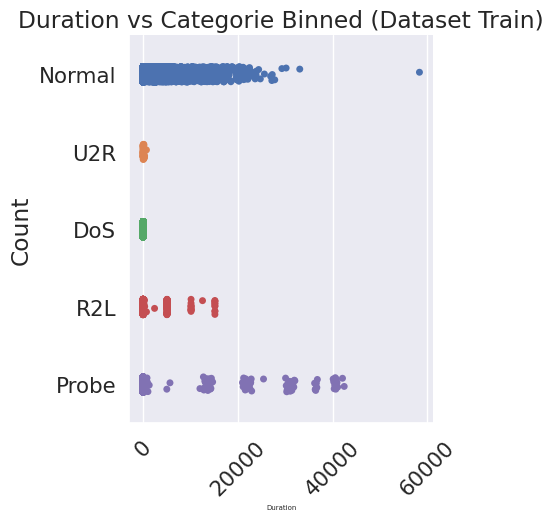

In [53]:
plt.figure(figsize=(25, 8))
sns.catplot(data=dataset_df, x='duration', y='categorie_binned',hue='categorie_binned')
plt.title('Duration vs Categorie Binned (Dataset Train)')
plt.xlabel('Duration', fontsize=5)
plt.ylabel('Count')
plt.xticks(rotation=45)
#plt.legend(title='Categorie Binned')
plt.show()

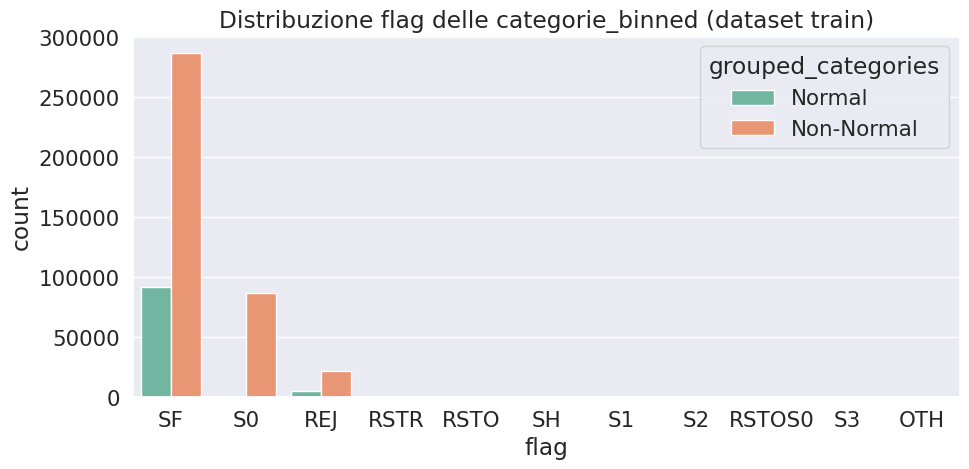

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

#symbolic_columns = ['protocol_type', 'flag']

custom_palette = sns.color_palette("Set2", 2)  # Puoi scegliere una palette diversa a tuo piacimento

plt.figure(figsize=(10, 5))

# Create a new column 'grouped_categories' based on 'categorie_binned'
dataset_df['grouped_categories'] = dataset_df['categorie_binned'].apply(lambda x: 'Non-Normal' if x != 'Normal' else x)

sorted_counts = dataset_df['flag'].value_counts().sort_values(ascending=False)

# Filter out 'Normal' and 'DoS' categories before plotting
sns.countplot(x='flag', hue='grouped_categories', data=dataset_df,
              order=sorted_counts.index, palette=custom_palette)
plt.title(f'Distribuzione flag delle categorie_binned (dataset train)')

plt.tight_layout()
plt.show()

# ***Feature più importanti***

In [55]:
from sklearn.ensemble import RandomForestClassifier

X = dataset_df.drop(['label','protocol_type','service','flag','land','logged_in',
                'is_host_login','is_guest_login','categorie_binned','grouped_categories'], axis=1)
y = dataset_df['label']

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

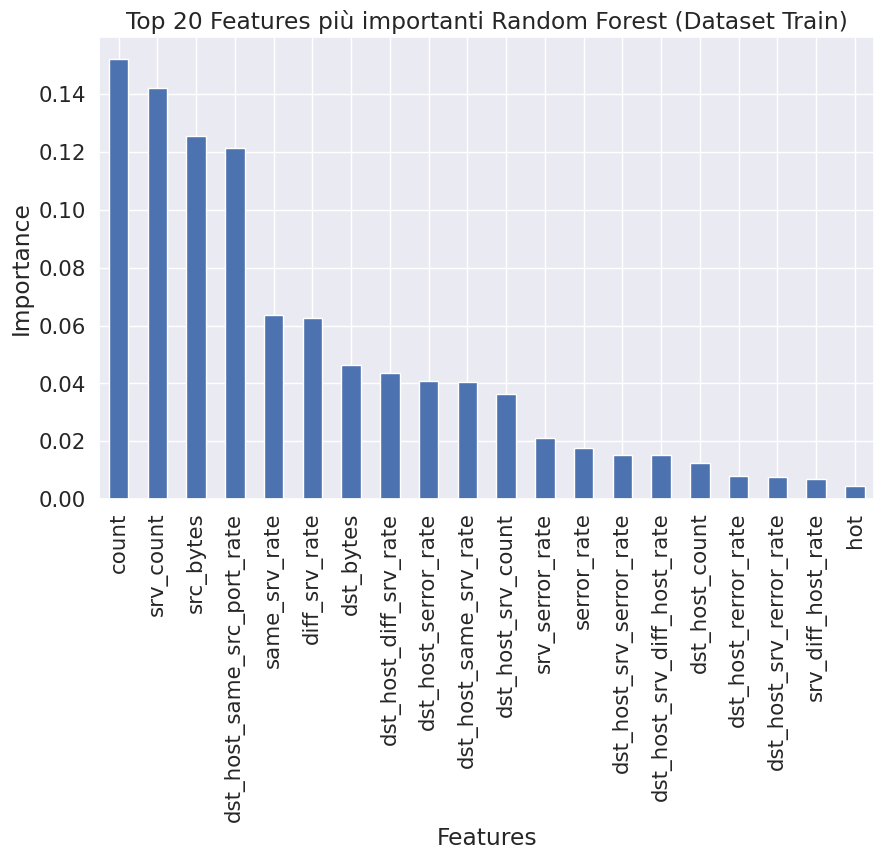

In [56]:
# Select only the top 20 features
top_features = feature_importance.head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Top 20 Features più importanti Random Forest (Dataset Train)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# ***Data points per attacco***

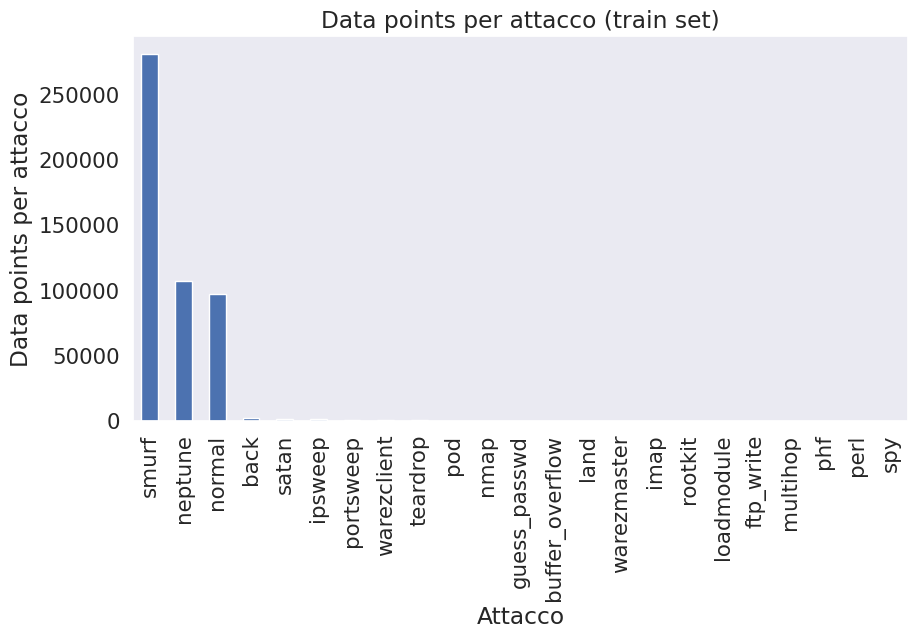

In [57]:
plt.figure(figsize=(10,5))
class_distribution = dataset_df['label'].value_counts()
class_distribution.plot(kind='bar')
plt.title('Data points per attacco (train set)')
plt.xlabel('Attacco')
plt.ylabel('Data points per attacco')
plt.grid()
plt.show()

In [58]:
df_test = dataset_df[['label','duration']]
df_test = df_test.rename(columns={'duration':'conteggio'})

In [59]:
df_test.groupby('label').count().sort_values(by='conteggio', ascending=False)
#Diagrammi a torte

,conteggio
label,
smurf,280790
neptune,107201
...,...
perl,3
spy,2


In [60]:
df_test = dataset_df[['categorie_binned','duration']]
df_test = df_test.rename(columns={'duration':'conteggio'})
#pd.DataFrame(dataset_df.groupby('categorie_binned')['categorie_binned'].count().sort_values(ascending=False))
#Diagrammi a torte

In [61]:
df_test.groupby('categorie_binned').count().sort_values(by='conteggio', ascending=False)

,conteggio
categorie_binned,
DoS,391458
Normal,97277
Probe,4107
R2L,1126
U2R,52


from matplotlib import pyplot as plt
_df_0['conteggio'].plot(kind='hist', bins=20, title='conteggio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('categorie_binned').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['conteggio'].plot(kind='line', figsize=(8, 4), title='conteggio')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['categorie_binned'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='conteggio', y='categorie_binned', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# ***Creazione dell'NDAE con categorie_binned:***




In [25]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

# Encode text values to dummy variables(i.e. [1,0,0],
# [0,1,0],[0,0,1] for red,green,blue)
"""
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
"""

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])

    # Concatenate the dummy columns with the original DataFrame
    df = pd.concat([df, dummies], axis=1)

    # Drop the original column
    df.drop(name, axis=1, inplace=True)

    return df

In [26]:
from sklearn.model_selection import train_test_split
# Now encode the feature vector

#Elimino eventuali valori duplicati
dataset_df.drop_duplicates(keep='first', inplace=True)

#Elimino eventuali valori nulli
dataset_df.dropna(inplace = True)

pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 5)

for name in dataset_df.columns:
  if name == 'categorie_binned':
    pass
  elif name in ['protocol_type','service','flag','land','logged_in',
                'is_host_login','is_guest_login', 'label', 'grouped_categories']:
    dataset_df = encode_text_dummy(dataset_df,name)
  else:
    encode_numeric_zscore(dataset_df,name)

# display 5 rows

dataset_df.dropna(inplace=True,axis=1)
dataset_df[0:5]


# Convert to numpy - Classification
x_columns = dataset_df.columns.drop('categorie_binned')
x = dataset_df[x_columns].values
dummies = pd.get_dummies(dataset_df['categorie_binned']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

# Split del dataset in training e test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.592, random_state=42, shuffle=True)

In [27]:
print(dataset_df.shape)

(145585, 146)


In [28]:
#dataset_df.to_excel('test.xlsx')

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Creazione di un autoencoder non simmetrico con attivazioni sigmoid
model = Sequential(name="S-NDAE")

# Encoder
model.add(Dense(41, activation='sigmoid'))
model.add(Dense(14, activation='sigmoid'))
model.add(Dense(28, activation='sigmoid'))
model.add(Dense(28, activation='sigmoid'))

model.add(Dense(14, activation='sigmoid'))
model.add(Dense(28, activation='sigmoid'))
model.add(Dense(28, activation='sigmoid'))

# Aggiunta del classificatore finale per la classificazione multiclasse
num_classes = len(dataset_df['categorie_binned'].unique())  # Calcola il numero di classi nel tuo dataset
model.add(Dense(num_classes, activation='softmax'))

# Compilazione del modello
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# One-hot encoding delle etichette per la classificazione multiclasse
#y = pd.get_dummies(dataset_df['categorie_binned']).values

# Addestramento dell'autoencoder
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
1857/1857 [==============================] - 22s 10ms/step - loss: 0.2798 - accuracy: 0.9135 - val_loss: 0.1022 - val_accuracy: 0.9783
Epoch 2/10
1857/1857 [==============================] - 22s 12ms/step - loss: 0.0516 - accuracy: 0.9849 - val_loss: 0.0204 - val_accuracy: 0.9928
Epoch 3/10
1857/1857 [==============================] - 19s 10ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0080 - val_accuracy: 0.9994
Epoch 4/10
1857/1857 [==============================] - 18s 10ms/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0035 - val_accuracy: 0.9996
Epoch 5/10
1857/1857 [==============================] - 19s 10ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0023 - val_accuracy: 0.9996
Epoch 6/10
1857/1857 [==============================] - 18s 10ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 7/10
1857/1857 [==============================] - 13s 7ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0016 - 

In [30]:
# Estrazione delle feature latenti (encoder)
#encoder_layers = model.layers[:3]  # Estrai gli strati corrispondenti all'encoder
encoder_layers = model.layers[:6]
encoder = Sequential(encoder_layers)

# Estrai le feature latenti
encoded_features_train = encoder.predict(x_train)
encoded_features_test = encoder.predict(x_test)

# Addestramento di un classificatore Random Forest sulle feature latenti
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(encoded_features_train, y_train.argmax(axis=1))  # Argmax per ottenere l'indice della classe reale

# Valutazione del classificatore
y_pred = classifier.predict(encoded_features_test)

# Calcola le metriche
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)  # Argmax per ottenere l'indice della classe reale
precision = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
recall = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
f1 = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')

# Stampa i risultati
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Summary of the model structure.
model.summary()

# Export the model to a SavedModel.
#model.save("project/model")

print(f'Accuracy of Random Forest classifier on encoded features: {accuracy}')

2694/2694 [==============================] - 4s 1ms/step
Accuracy: 0.9998
Precision: 0.9998
Recall: 0.9998
F1 Score: 0.9998
Model: "S-NDAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 41)                6724      
                                                                 
 dense_1 (Dense)             (None, 14)                588       
                                                                 
 dense_2 (Dense)             (None, 28)                420       
                                                                 
 dense_3 (Dense)             (None, 28)                812       
                                                                 
 dense_4 (Dense)             (None, 14)                406       
                                                                 
 dense_5 (Dense)             (None, 28)                420       
  

In [31]:
!pip install pydot
!pip install graphviz

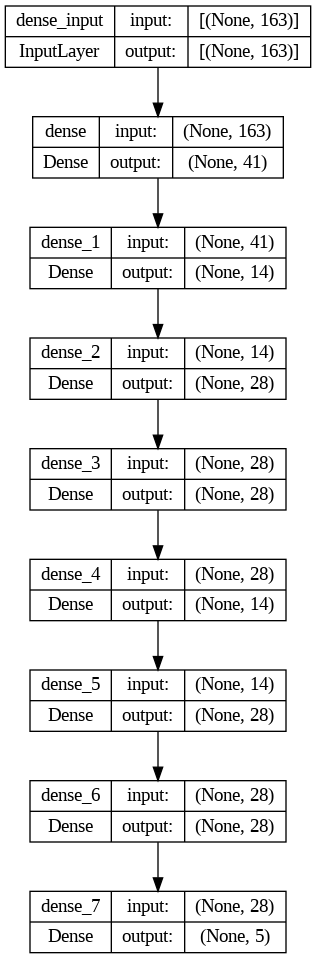

In [32]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Salva il diagramma del modello in un file immagine
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [33]:
from sklearn.metrics import *
#fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, pred)
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    pred = lb.transform(pred)
    return roc_auc_score(y_test, pred, average=average)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


roc_auc_score = multiclass_roc_auc_score(np.argmax(y_test,axis=1), y_pred)
print('='*50)
print("ROC-AUC score: {}".format(roc_auc_score))

ROC-AUC score: 0.9804639078324972


In [35]:
import seaborn as sns
import datetime as dt

def confusion_matrix_func(y_test, y_test_pred):

    '''
    This function computes the confusion matrix using Predicted and Actual values and plots a confusion matrix heatmap
    '''
    # Calcola la confusion matrix
    C = confusion_matrix(y_test.argmax(axis=1), y_pred)

    cm_df = pd.DataFrame(C)
    labels = ['Normal','DoS','Probe','R2L','U2R']
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

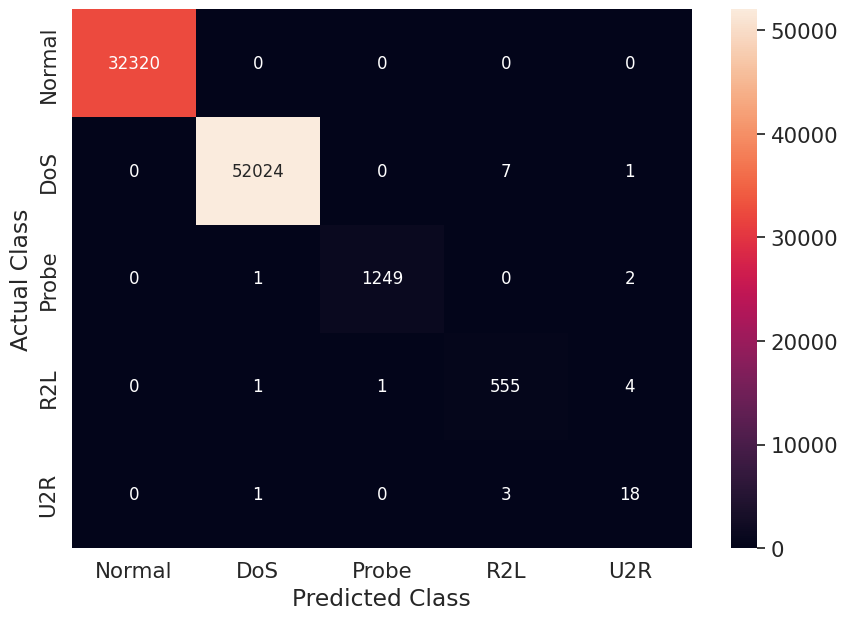

In [36]:
confusion_matrix_func(y_test, y_pred)